## Comparing Growth Trends between Bitcoin, Ethereum and Alt(2017 to 2021)

In [2]:
#Initial imports
import os
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns 

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/renatabal/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
#Read in our crypto data
btc_data = pd.read_csv("BTC_USD_2017-01-01_2021-01-02-CoinDesk.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
eth_data  = pd.read_csv("ETH_USD_2017-01-01_2021-01-02-CoinDesk.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
xlm_data = pd.read_csv("StellarXLM_USD_2020-01-29_2021-01-02-CoinDesk.csv",index_col="Date", parse_dates=True, infer_datetime_format=True)
xrp_data = pd.read_csv("XRP_USD_2020-01-29_2021-01-02-CoinDesk.csv",index_col="Date", parse_dates=True, infer_datetime_format=True)
teth_data = pd.read_csv("TetherUSDT_USD_2020-01-29_2021-01-02-CoinDesk.csv",index_col="Date", parse_dates=True, infer_datetime_format=True)

In [4]:
#Filter data for closing prices
btc_data = btc_data.rename(columns={'Closing Price (USD)':'BTC'})
eth_data = eth_data.rename(columns={'Closing Price (USD)':'ETH'})
xlm_data = xlm_data.rename(columns={'Closing Price (USD)':'XLM'})
xrp_data = xrp_data.rename(columns={'Closing Price (USD)':'XRP'})
teth_data = teth_data.rename(columns={'Closing Price (USD)':'Teth'})

In [5]:
btc_data = btc_data.drop(columns= ["Currency", "24h Open (USD)", "24h High (USD)", "24h Low (USD)"])
eth_data = eth_data.drop(columns= ["Currency", "24h Open (USD)", "24h High (USD)", "24h Low (USD)"])
xlm_data = xlm_data.drop(columns= ["Currency", "24h Open (USD)", "24h High (USD)", "24h Low (USD)"])
xrp_data = xrp_data.drop(columns= ["Currency", "24h Open (USD)", "24h High (USD)", "24h Low (USD)"])
teth_data = teth_data.drop(columns= ["Currency", "24h Open (USD)", "24h High (USD)", "24h Low (USD)"])


In [6]:
#Concatanate Bitcoin and Ethereum data
btc_eth = pd.concat([btc_data, eth_data],axis="columns", join="inner")
btc_eth.head()

,BTC,ETH
Date,,
2017-01-01,964.32500,8.437012
2017-01-02,1009.97375,8.212046
2017-01-03,1028.33375,8.332855
2017-01-04,1047.09999,10.435576
2017-01-05,1140.38500,11.445979


In [7]:
#Calculate Daily Returns for BTC and ETH
btc_eth = btc_eth.pct_change().dropna()

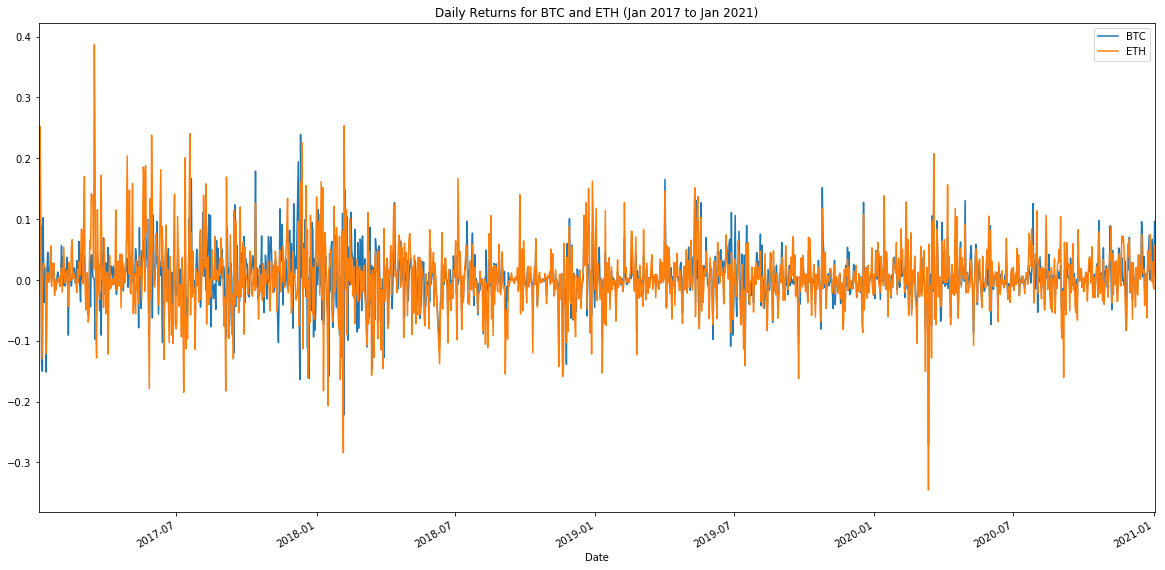

In [8]:
#Plot Daily Returns of BTC and ETH
btc_eth = btc_eth.plot(figsize = (20,10), title = "Daily Returns for BTC and ETH (Jan 2017 to Jan 2021)")

In [9]:
#Concatenate Stellar, Ripple, and Tether data (note: data is from Jan 28 20202)

In [19]:
combined_crypto = pd.concat ([btc_data, eth_data, xlm_data, xrp_data, teth_data],axis="columns", join="inner")
combined_crypto.head()

,BTC,ETH,XLM,XRP,Teth
Date,,,,,
2020-01-29,9320.978406,175.460322,0.060939,0.236833,0.997697
2020-01-30,9545.077957,186.262041,0.062786,0.245716,0.997961
2020-01-31,9388.880752,181.728434,0.060894,0.239005,0.998550
2020-02-01,9363.193383,182.773989,0.062003,0.241345,0.998503
2020-02-02,9385.260386,189.312553,0.064519,0.252280,1.000383


In [20]:
#Calculate and plot daily returns 
combined_crypto = combined_crypto.pct_change().dropna()

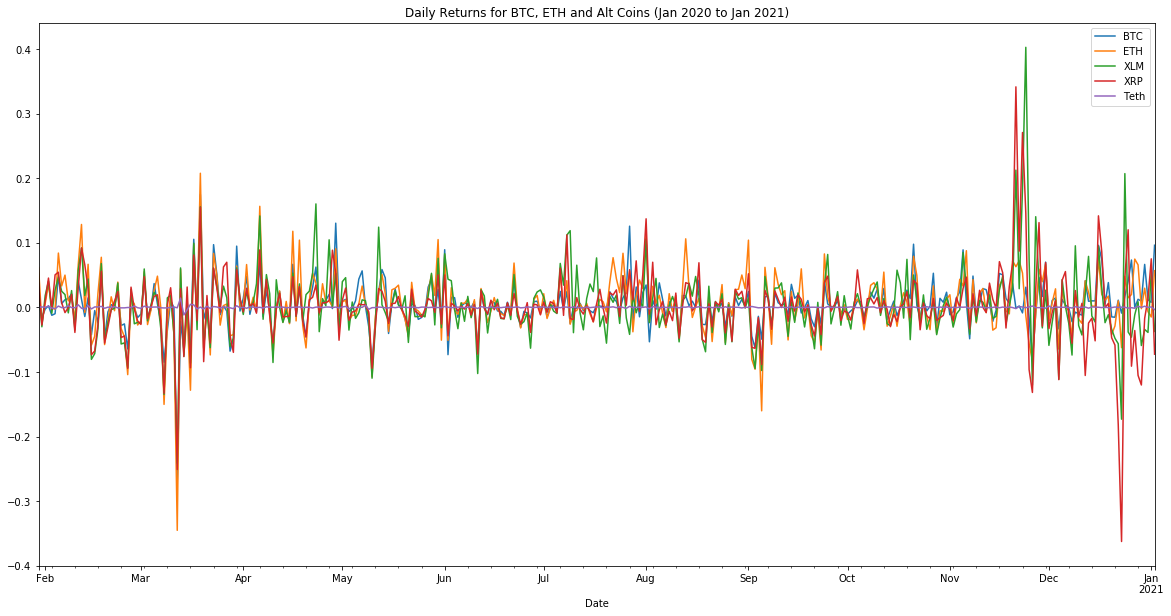

In [25]:

combined_crypto.plot(figsize=(20,10), title = "Daily Returns for BTC, ETH and Alt Coins (Jan 2020 to Jan 2021)")

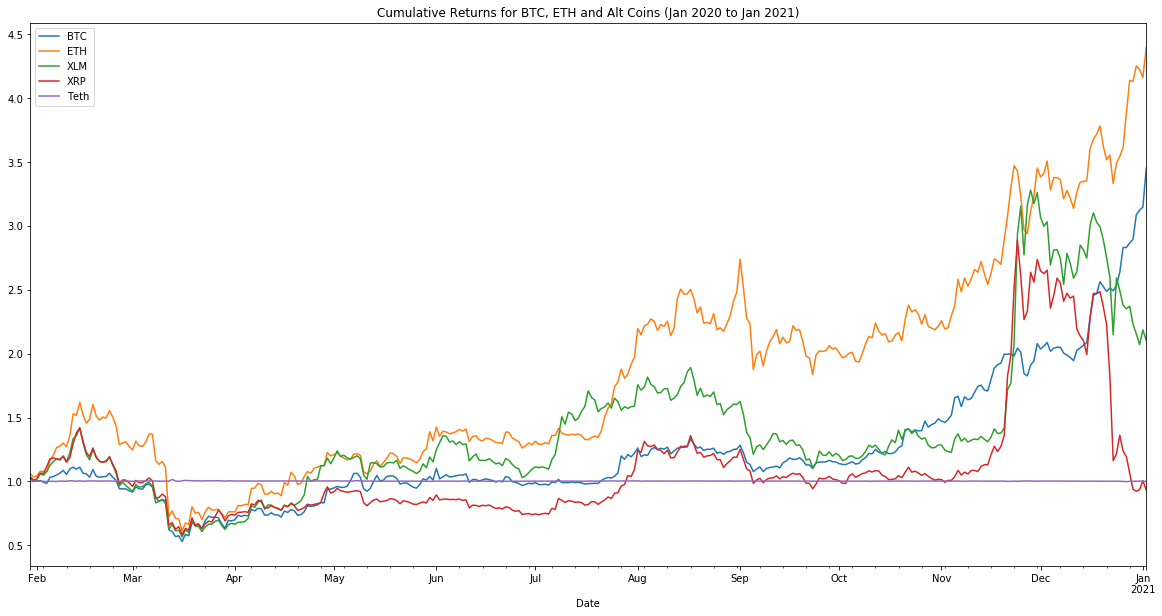

In [26]:
#Calculate and plot cumulative returns 
cumulative_returns = (1 + combined_crypto).cumprod() 
cumulative_returns.plot(figsize = (20,10), title = "Cumulative Returns for BTC, ETH and Alt Coins (Jan 2020 to Jan 2021)")

### Conclusions: 
### BTC and ETH show very similar growth trends. Stellar (XLM) and Ripple (XRP) show very similar growth trends. Tether is flat. 
### Not all crypto is created equal however, there is a general increase in crypto investments since July 2020. The larger returns in Eth are likely due to the increasing trend in blockchain/smart contract technology and DeFi projects using the Ethereum blockchain.

#Calculate and plot correlation between Alt Coins 
correlation = combined_crypto.corr()
correlation

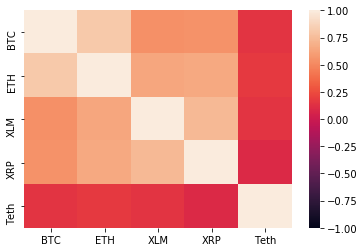

In [24]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [ ]:
##What conclusions have we come to?? 